## Pacotes utilizados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from pyautogui import size

## Importando e verificando dados

In [3]:
dados_tratados = pd.read_csv('dados_agrupados_por_nome.csv', sep=';', encoding='latin-1')

In [4]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26663 entries, 0 to 26662
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DS_ELEICAO                 26663 non-null  object
 1   SG_UF                      26663 non-null  object
 2   DS_CARGO                   26663 non-null  object
 3   NM_URNA_CANDIDATO          26663 non-null  object
 4   SG_PARTIDO                 26663 non-null  object
 5   DS_SIT_TOT_TURNO           26663 non-null  object
 6   QT_VOTOS_NOMINAIS_VALIDOS  26663 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [5]:
dados_tratados.head(2)

,DS_ELEICAO,SG_UF,DS_CARGO,NM_URNA_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS_VALIDOS
0,ELEIÇÃO CONSELHO DISTRITAL 2022,PE,Conselheiro Distrital,AILTON JUNIOR,P41,ELEITO,394
1,ELEIÇÃO CONSELHO DISTRITAL 2022,PE,Conselheiro Distrital,ARTUR CÂNDIDO,P59,NÃO ELEITO,78


In [6]:
dados_tratados.DS_CARGO.value_counts()

Deputado Estadual        15607
Deputado Federal          9712
Deputado Distrital         581
Presidente                 308
Senador                    217
Governador                 213
Conselheiro Distrital       25
Name: DS_CARGO, dtype: int64

In [7]:
dados_tratados.DS_SIT_TOT_TURNO.unique()

array(['ELEITO', 'NÃO ELEITO', '2º TURNO', 'ELEITO POR QP', 'SUPLENTE',
       'ELEITO POR MÉDIA'], dtype=object)

## Análise de eleitos no 1º turno

### Deputado estadual

In [8]:
dep_est_eleitos = dados_tratados[
    ( dados_tratados['DS_CARGO'] == 'Deputado Estadual' ) & 
    (( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA' ))
]
dep_est_eleitos.shape

(1035, 7)

#### Votos por candidato

In [9]:
qtd_vot_dep_est = pd.DataFrame(dep_est_eleitos.groupby(['SG_UF','SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
qtd_vot_dep_est.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
qtd_vot_dep_est.reset_index(inplace=True)
# qtd_vot_dep_est.columns = ['Estado', 'Partido', 'Candidato', 'Votos']
qtd_vot_dep_est.head()

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
0,SP,PT,EDUARDO SUPLICY,807015
1,MG,PL,BRUNO ENGLER,637412
2,SP,PSOL,CARLOS GIANNAZI,276811
3,SP,PSOL,PAULA DA BANCADA FEMINISTA,259771
4,MG,PT,BEATRIZ CERQUEIRA,248664


#### Qtd. eleitos por partido

In [10]:
qtd_dep_est_partido = pd.DataFrame(qtd_vot_dep_est['SG_PARTIDO'].value_counts())
qtd_dep_est_partido.reset_index(inplace=True)
qtd_dep_est_partido.rename(columns={'SG_PARTIDO':'Qtd Dep. Est. Eleitos', 'index':'Partido'}, inplace=True)

total_de_eleitos = qtd_dep_est_partido['Qtd Dep. Est. Eleitos'].sum()
qtd_dep_est_partido['%'] = ((qtd_dep_est_partido['Qtd Dep. Est. Eleitos'] / total_de_eleitos) * 100).round(2)

qtd_dep_est_partido.head(2)

,Partido,Qtd Dep. Est. Eleitos,%
0,PL,125,12.08
1,PT,115,11.11


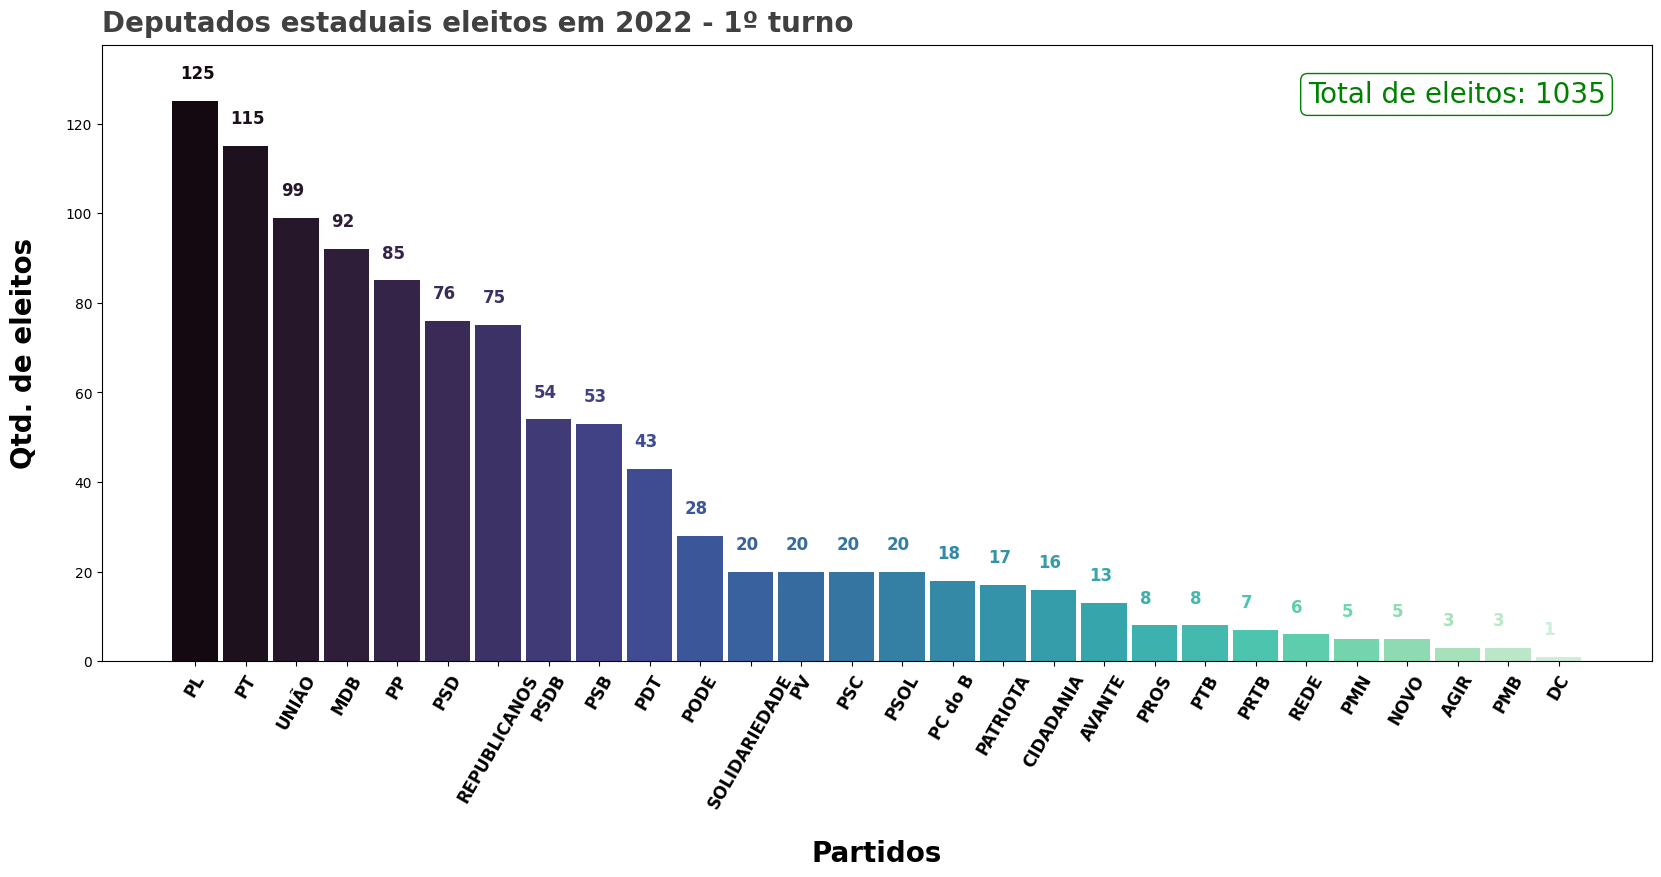

In [11]:
# Tamanho
plt.figure( figsize=(20, 8) )

# Paleta
Paleta_Cores = sns.color_palette('mako', len(qtd_dep_est_partido) )

# Plot
plt.bar( 
    qtd_dep_est_partido['Partido'], 
    qtd_dep_est_partido['Qtd Dep. Est. Eleitos'],
    width=0.9,
    color=Paleta_Cores
     )

# Titulo
plt.title('Deputados estaduais eleitos em 2022 - 1º turno', loc='left', fontsize=20, color='#404040', fontweight=600, pad=10)

# Labels
plt.ylabel('Qtd. de eleitos', size=20, labelpad= 20, fontweight ='bold')
plt.xlabel('Partidos', size=20, labelpad= 20, fontweight ='bold')
plt.xticks( rotation=60, size=12,fontweight ='bold' )

# Ajustando escala do gráfico
plt.ylim( 0, qtd_dep_est_partido['Qtd Dep. Est. Eleitos'].max() + ( qtd_dep_est_partido['Qtd Dep. Est. Eleitos'].max() * 0.1 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( qtd_dep_est_partido['Qtd Dep. Est. Eleitos'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.3, Valor + 5 ,
      # Valor no gráfico
      Valor,
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )

# Total de eleitos
Total_Eleitos = qtd_dep_est_partido['Qtd Dep. Est. Eleitos'].sum()

# Info complementar
plt.annotate(
    f'Total de eleitos: {Total_Eleitos}',
    xy=(0.97, 0.92),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=20,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
);

### Deputado federal

In [12]:
dep_fed_eleitos = dados_tratados[
    ( dados_tratados['DS_CARGO'] == 'Deputado Federal' ) & 
    (( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA' ))
]
dep_fed_eleitos.shape

(513, 7)

#### Votos por candidato

In [13]:
qtd_vot_dep_fed = pd.DataFrame(dep_fed_eleitos.groupby(['SG_UF','SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
qtd_vot_dep_fed.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
qtd_vot_dep_fed.reset_index(inplace=True)
#qtd_vot_dep_fed.columns = ['Estado', 'Partido', 'Candidato', 'Votos']
qtd_vot_dep_fed.head()

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
0,MG,PL,NIKOLAS FERREIRA,1492047
1,SP,PSOL,GUILHERME BOULOS,1001472
2,SP,PL,CARLA ZAMBELLI,946244
3,SP,PL,EDUARDO BOLSONARO,741701
4,SP,PL,RICARDO SALLES,640918


#### Qtd. eleitos por partido

In [14]:
qtd_dep_fed_partido = pd.DataFrame(qtd_vot_dep_fed['SG_PARTIDO'].value_counts())
qtd_dep_fed_partido.reset_index(inplace=True)
qtd_dep_fed_partido.rename(columns={'SG_PARTIDO':'Qtd Dep. Fed. Eleitos', 'index':'Partido'}, inplace=True)

total_de_eleitos = qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'].sum()
qtd_dep_fed_partido['%'] = ((qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'] / total_de_eleitos) * 100).round(2)

qtd_dep_fed_partido.head()

,Partido,Qtd Dep. Fed. Eleitos,%
0,PL,99,19.30
1,PT,67,13.06
2,UNIÃO,59,11.50
3,PP,47,9.16
4,PSD,42,8.19


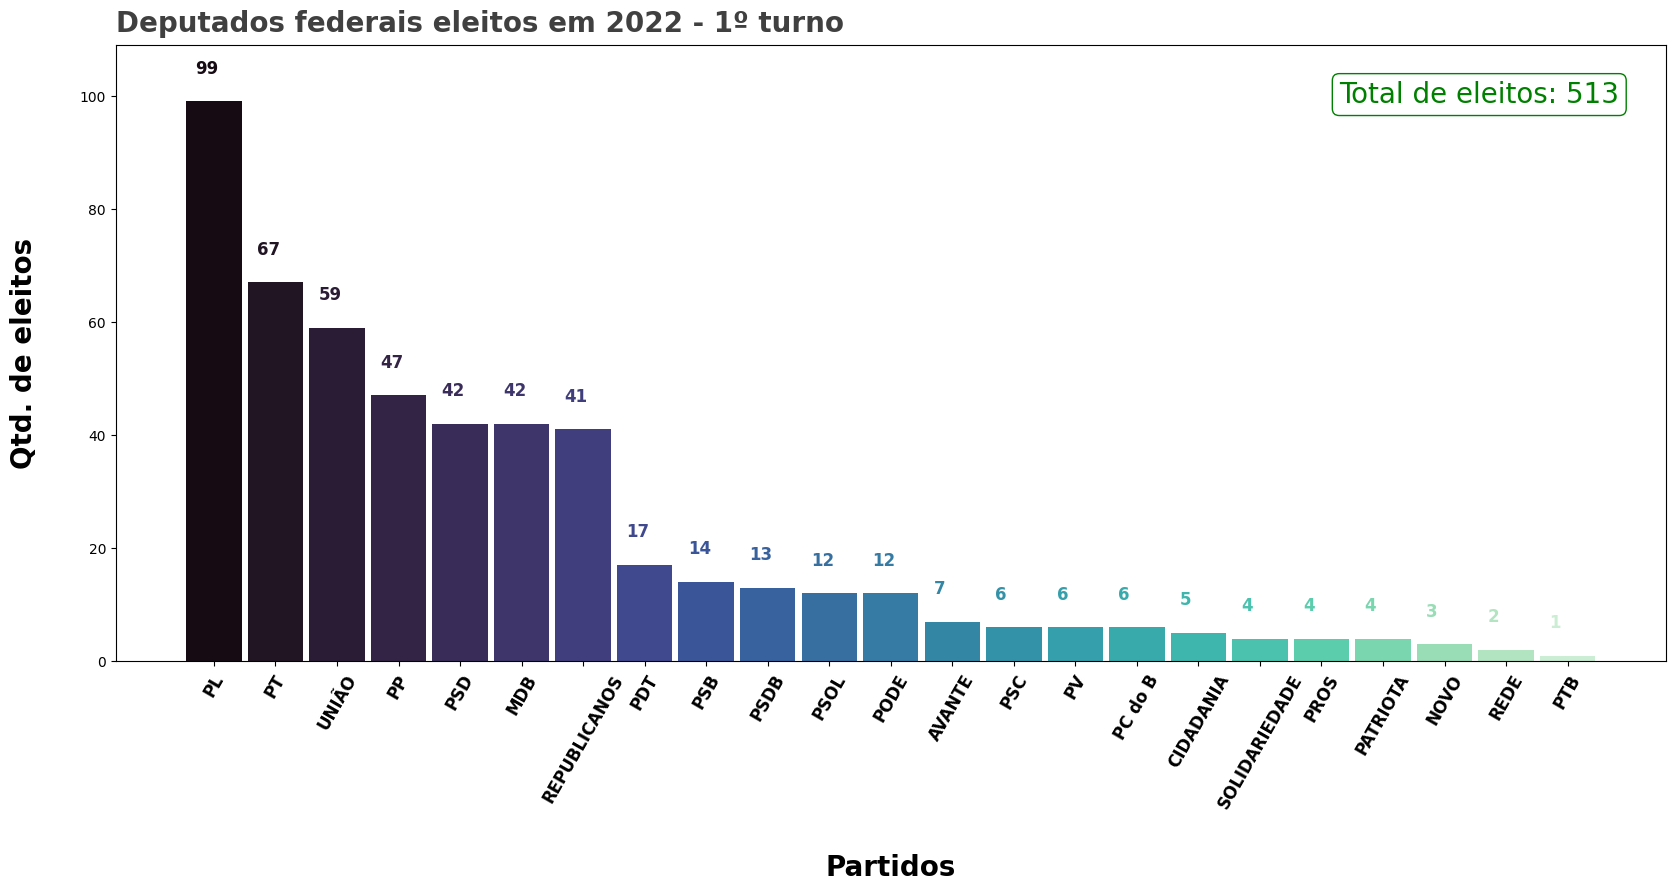

In [15]:
# Tamanho
plt.figure( figsize=(20, 8) )

# Paleta
Paleta_Cores = sns.color_palette('mako', len(qtd_dep_fed_partido) )

# Plot
plt.bar( 
    qtd_dep_fed_partido['Partido'],
    qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'],
    width=0.9,
    color=Paleta_Cores
     )

# Titulo
plt.title('Deputados federais eleitos em 2022 - 1º turno', loc='left', fontsize=20, color='#404040', fontweight=600, pad=10)

# Labels
plt.ylabel('Qtd. de eleitos', size=20, labelpad= 30, fontweight ='bold')
plt.xlabel('Partidos', size=20, labelpad= 30, fontweight ='bold')
plt.xticks( rotation=60, size=12, fontweight ='bold')

# Ajustando escala do gráfico
plt.ylim( 0, qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'].max() + ( qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'].max() * 0.1 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.3, Valor + 5 ,
      # Valor no gráfico
      Valor,
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )

# Total de eleitos
Total_Eleitos = qtd_dep_fed_partido['Qtd Dep. Fed. Eleitos'].sum()

# Info complementar
plt.annotate(
    f'Total de eleitos: {Total_Eleitos}',
    xy=(0.97, 0.92),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=20,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
);

### Governador

In [16]:
gov_eleitos = dados_tratados[
    ( dados_tratados['DS_CARGO'] == 'Governador' ) & 
    (( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA' ))
]
gov_eleitos.shape

(15, 7)

#### Votos por candidato

In [17]:
qtd_vot_gov = pd.DataFrame(gov_eleitos.groupby(['SG_UF','SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
qtd_vot_gov.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
qtd_vot_gov.reset_index(inplace=True)
#qtd_vot_gov.columns = ['Estado', 'Partido', 'Candidato', 'Votos']
qtd_vot_gov.head()

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
0,MG,NOVO,ZEMA,6094136
1,RJ,PL,CLÁUDIO CASTRO,4930288
2,PR,PSD,CARLOS MASSA RATINHO JUNIOR,4243292
3,PA,MDB,HELDER,3117276
4,CE,PT,ELMANO DE FREITAS,2808300


#### Qtd. eleitos por partido

In [18]:
qtd_gov_partido = pd.DataFrame(qtd_vot_gov['SG_PARTIDO'].value_counts())
qtd_gov_partido.reset_index(inplace=True)
qtd_gov_partido.rename(columns={'SG_PARTIDO':'Qtd Gov. Eleitos', 'index':'Partido'}, inplace=True)

total_de_eleitos = qtd_gov_partido['Qtd Gov. Eleitos'].sum()
qtd_gov_partido['%'] = ((qtd_gov_partido['Qtd Gov. Eleitos'] / total_de_eleitos) * 100).round(2)

qtd_gov_partido.head()

,Partido,Qtd Gov. Eleitos,%
0,PT,3,20.00
1,MDB,2,13.33
2,UNIÃO,2,13.33
3,PP,2,13.33
4,NOVO,1,6.67


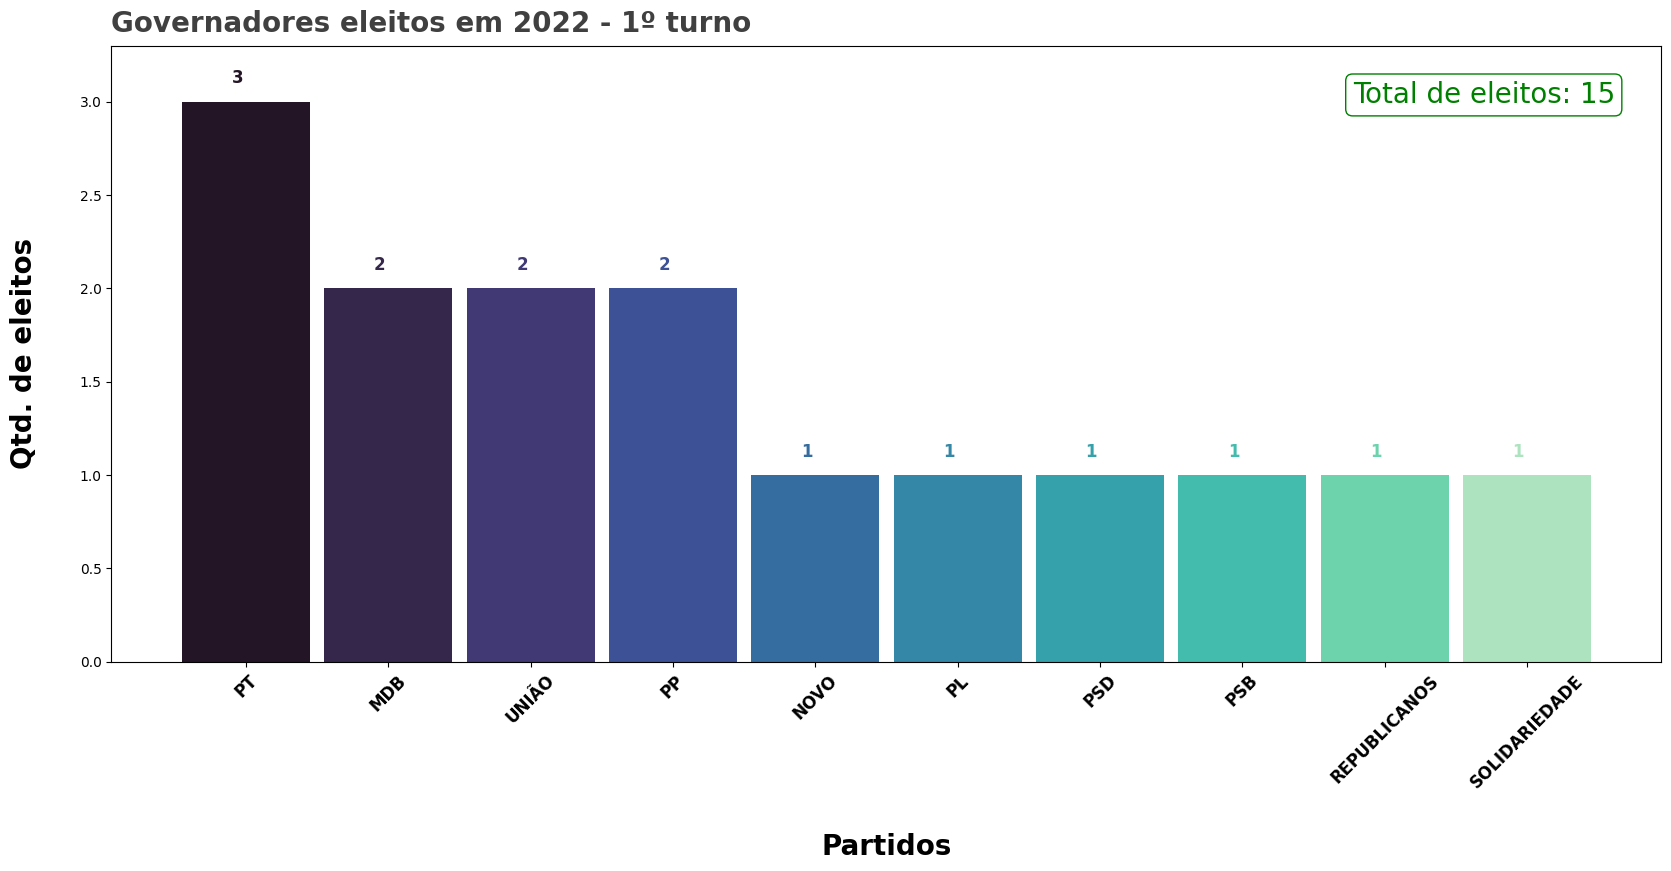

In [19]:
# Tamanho
plt.figure( figsize=(20, 8) )

# Paleta
Paleta_Cores = sns.color_palette('mako', len(qtd_gov_partido) )

# Plot
plt.bar( 
    qtd_gov_partido['Partido'], 
    qtd_gov_partido['Qtd Gov. Eleitos'],
    width=0.9,
    color=Paleta_Cores
     )

# Titulo
plt.title('Governadores eleitos em 2022 - 1º turno', loc='left', fontsize=20, color='#404040', fontweight=600, pad=10)

# Labels
plt.ylabel('Qtd. de eleitos', size=20, labelpad= 30, fontweight ='bold')
plt.xlabel('Partidos', size=20, labelpad= 30, fontweight ='bold')
plt.xticks( rotation=45, size=12, fontweight ='bold')

# Ajustando escala do gráfico
plt.ylim( 0, qtd_gov_partido['Qtd Gov. Eleitos'].max() + ( qtd_gov_partido['Qtd Gov. Eleitos'].max() * 0.1 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( qtd_gov_partido['Qtd Gov. Eleitos'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.1, Valor + 0.1 ,
      # Valor no gráfico
      Valor,
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )

# Total de eleitos
Total_Eleitos = qtd_gov_partido['Qtd Gov. Eleitos'].sum()

# Info complementar
plt.annotate(
    f'Total de eleitos: {Total_Eleitos}',
    xy=(0.97, 0.92),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=20,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
);

### Senador

In [20]:
sen_eleitos = dados_tratados[
    ( dados_tratados['DS_CARGO'] == 'Senador' ) & 
    (( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA' ))
]
sen_eleitos.shape

(27, 7)

#### Votos por candidato

In [21]:
qtd_vot_sen = pd.DataFrame(sen_eleitos.groupby(['SG_UF','SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
qtd_vot_sen.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
qtd_vot_sen.reset_index(inplace=True)
#qtd_vot_sen.columns = ['Estado', 'Partido', 'Candidato', 'Votos']
qtd_vot_sen.head()

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
0,SP,PL,ASTRONAUTA MARCOS PONTES,10714913
1,MG,PSC,CLEITINHO,4268193
2,BA,PSD,OTTO ALENCAR,4218333
3,CE,PT,CAMILO,3389513
4,RS,REPUBLICANOS,HAMILTON MOURÃO,2593294


#### Qtd. eleitos por partido

In [22]:
qtd_sen_partido = pd.DataFrame(qtd_vot_sen['SG_PARTIDO'].value_counts())
qtd_sen_partido.reset_index(inplace=True)
qtd_sen_partido.rename(columns={'SG_PARTIDO':'Qtd Sen. Eleitos', 'index':'Partido'}, inplace=True)

total_de_eleitos = qtd_sen_partido['Qtd Sen. Eleitos'].sum()
qtd_sen_partido['%'] = ((qtd_sen_partido['Qtd Sen. Eleitos'] / total_de_eleitos) * 100).round(2)

qtd_sen_partido.head()

,Partido,Qtd Sen. Eleitos,%
0,PL,8,29.63
1,UNIÃO,5,18.52
2,PT,4,14.81
3,PP,3,11.11
4,PSD,2,7.41


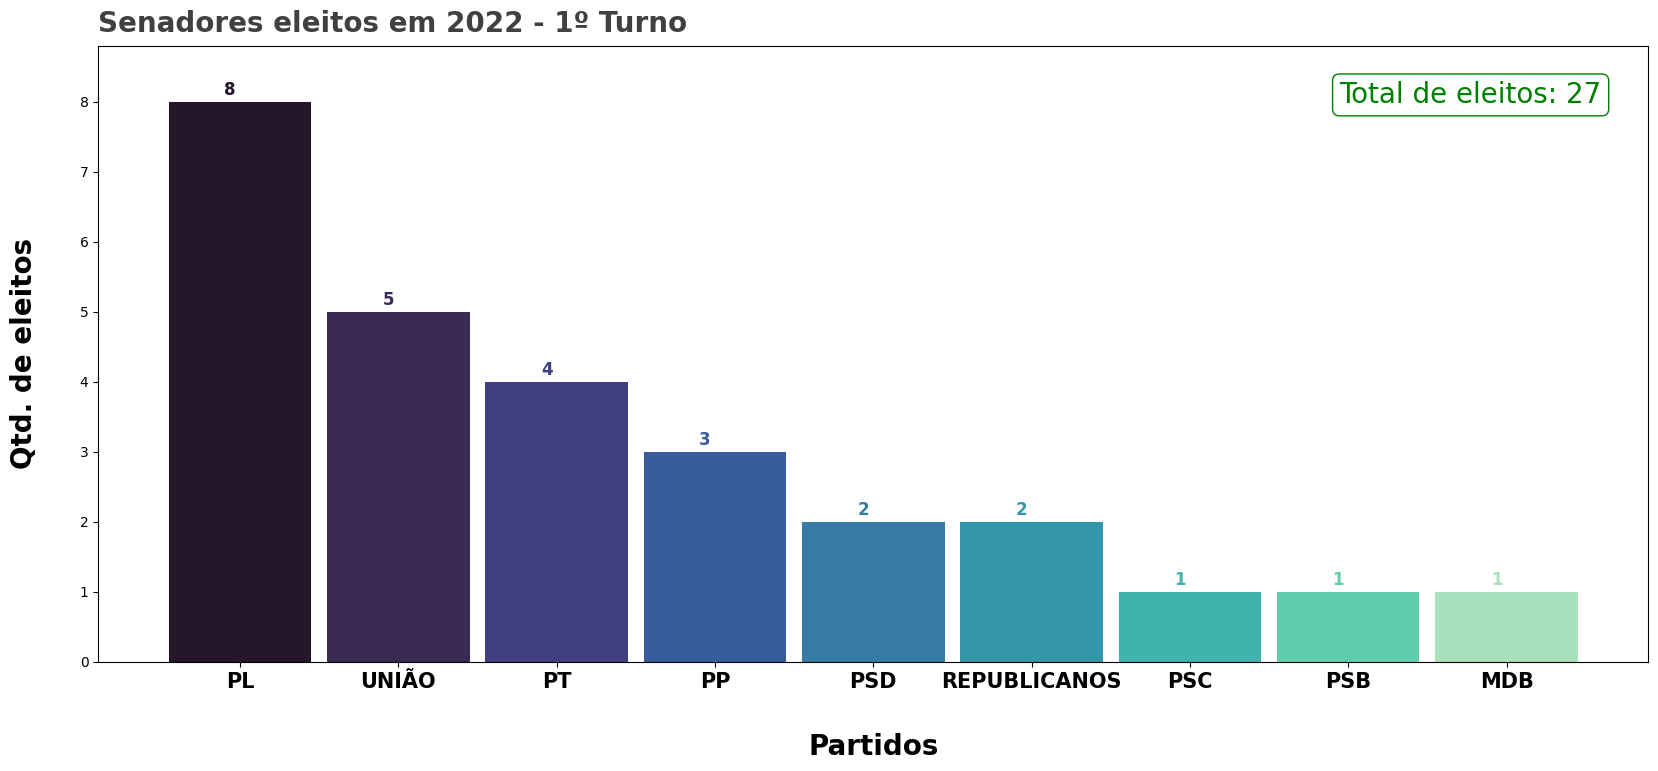

In [23]:
# Tamanho
plt.figure( figsize=(20, 8) )

# Paleta
Paleta_Cores = sns.color_palette('mako', len(qtd_sen_partido) )

# Plot
plt.bar( 
    qtd_sen_partido['Partido'], 
    qtd_sen_partido['Qtd Sen. Eleitos'],
    width=0.9,
    color=Paleta_Cores
     )

# Titulo
plt.title('Senadores eleitos em 2022 - 1º Turno', loc='left', fontsize=20, color='#404040', fontweight=600, pad=10)

# Labels
plt.ylabel('Qtd. de eleitos', size=20, labelpad= 30, fontweight ='bold')
plt.xlabel('Partidos', size=20, labelpad= 30, fontweight ='bold')
plt.xticks( rotation=0, fontsize=15, fontweight ='bold')

# Ajustando escala do gráfico
plt.ylim( 0, qtd_sen_partido['Qtd Sen. Eleitos'].max() + ( qtd_sen_partido['Qtd Sen. Eleitos'].max() * 0.1 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( qtd_sen_partido['Qtd Sen. Eleitos'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.1, Valor + 0.1 ,
      # Valor no gráfico
      Valor,
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )

# Total de eleitos
Total_Eleitos = qtd_sen_partido['Qtd Sen. Eleitos'].sum()

# Info complementar
plt.annotate(
    f'Total de eleitos: {Total_Eleitos}',
    xy=(0.97, 0.92),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=20,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
);

## Correalações entre cargos

#### Dep. estadutal X Dep. federal

In [24]:
correlacao = qtd_dep_est_partido[['Partido','Qtd Dep. Est. Eleitos']]
correlacao = pd.merge(correlacao, qtd_dep_fed_partido, on='Partido', how='inner')
correlacao.drop(columns='%', inplace=True)
correlacao.columns = ['Partido', 'Dep. Est.', 'Dep. Fed.']
correlacao.head()

,Partido,Dep. Est.,Dep. Fed.
0,PL,125,99
1,PT,115,67
2,UNIÃO,99,59
3,MDB,92,42
4,PP,85,47


##### Teste de hipótese
##### H<sup>null</sup> > Não há correlação entre eleitos para os cargos de dep. estadual e federal.
##### H<sup>alt</sup> > Há correlação entre eleitos para os cargos de dep. estadual e federal.

In [25]:
correlacao.corr()

C:\Users\mathe\AppData\Local\Temp\ipykernel_17712\3694027354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao.corr()


,Dep. Est.,Dep. Fed.
Dep. Est.,1.00000,0.95408
Dep. Fed.,0.95408,1.00000


In [26]:
ranksums(correlacao['Dep. Est.'], correlacao['Dep. Fed.'])

RanksumsResult(statistic=2.8120551103438545, pvalue=0.004922606838896177)

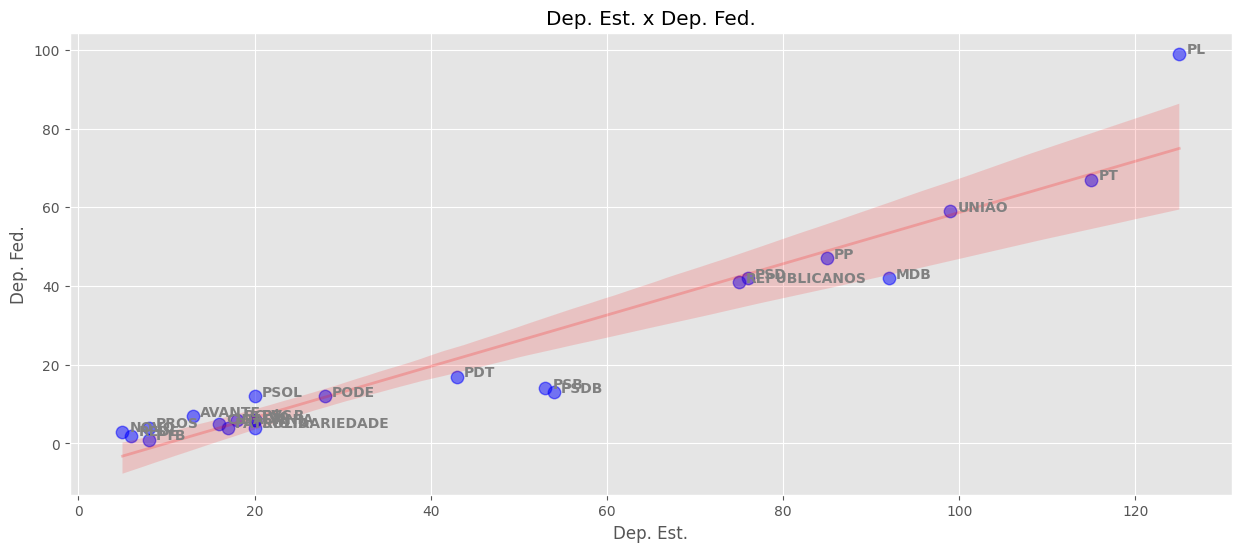

In [27]:
# Plot da regressão
plt.rcParams['figure.figsize'] = ( 15, 6 )
plt.style.use('ggplot')
sns.regplot(
    # Dados
    x=correlacao['Dep. Est.'],
    y=correlacao['Dep. Fed.'],

    # Intervalo de confiança para estimar a regressão
    ci = 95,

    # Cor dos pontos
    scatter_kws={
        'color' : 'blue',
        's' : 80,
        'alpha' : 0.5
    },

    # Cor da Linha
    line_kws={
        'color' : 'red',
        'alpha' : 0.2,
        'lw' : 2
    },
)

# titulo
plt.title('Dep. Est. x Dep. Fed.');

# Loop para incluir os textos
for Linha in range(0, correlacao.shape[0] ):

  # Incluindo os valores
  plt.text(
      correlacao['Dep. Est.'][Linha] + 0.8, 
      correlacao['Dep. Fed.'][Linha],
      correlacao['Partido'][Linha],
      size='medium',
      color='gray',
      weight='semibold'
  );

#### Todos os cargos

In [28]:
correlacao_geral = qtd_dep_est_partido[['Partido','Qtd Dep. Est. Eleitos']]
correlacao_geral = pd.merge(correlacao_geral, qtd_dep_fed_partido, on='Partido', how='inner')
correlacao_geral = pd.merge(correlacao_geral, qtd_gov_partido, on='Partido', how='inner')
correlacao_geral = pd.merge(correlacao_geral, qtd_sen_partido, on='Partido', how='inner')
correlacao_geral.drop(columns=['%_x','%_y','%'], inplace=True)
correlacao_geral.columns = ['Partido', 'Dep. Est.', 'Dep. Fed.', 'Gov.', 'Sen.']
correlacao_geral.head()

,Partido,Dep. Est.,Dep. Fed.,Gov.,Sen.
0,PL,125,99,1,8
1,PT,115,67,3,4
2,UNIÃO,99,59,2,5
3,MDB,92,42,2,1
4,PP,85,47,2,3


In [29]:
correlacao_geral.corr()

C:\Users\mathe\AppData\Local\Temp\ipykernel_17712\2805303029.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_geral.corr()


,Dep. Est.,Dep. Fed.,Gov.,Sen.
Dep. Est.,1.000000,0.949393,0.464554,0.823655
Dep. Fed.,0.949393,1.000000,0.195327,0.930768
Gov.,0.464554,0.195327,1.000000,0.060622
Sen.,0.823655,0.930768,0.060622,1.000000


## Análise da votação para presidente - 1º Turno

### Quantidade de votos no país

In [30]:
candidatos_presidente = dados_tratados[
    ( dados_tratados['DS_CARGO'] == 'Presidente' )]
candidatos_presidente.head(2)

,DS_ELEICAO,SG_UF,DS_CARGO,NM_URNA_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS_VALIDOS
25,ELEIÇÃO GERAL FEDERAL 2022,AC,Presidente,CIRO GOMES,PDT,NÃO ELEITO,12314
26,ELEIÇÃO GERAL FEDERAL 2022,AC,Presidente,CONSTITUINTE EYMAEL,DC,NÃO ELEITO,44


In [31]:
candidatos_presidente.NM_URNA_CANDIDATO.unique()

array(['CIRO GOMES', 'CONSTITUINTE EYMAEL', 'FELIPE D AVILA',
       'JAIR BOLSONARO', 'LULA', 'LÉO PÉRICLES', 'PADRE KELMON',
       'SIMONE TEBET', 'SOFIA MANZANO', 'SORAYA THRONICKE', 'VERA'],
      dtype=object)

In [32]:
qtd_vot_pres = pd.DataFrame(candidatos_presidente.groupby(['SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
qtd_vot_pres.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
qtd_vot_pres.reset_index(inplace=True)

porcentagem = qtd_vot_pres['QT_VOTOS_NOMINAIS_VALIDOS'].sum()
qtd_vot_pres['%'] = ((qtd_vot_pres['QT_VOTOS_NOMINAIS_VALIDOS'] / porcentagem) * 100).round(2)

qtd_vot_pres.head(2)

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,%
0,PT,LULA,57259504,48.43
1,PL,JAIR BOLSONARO,51072345,43.20


In [33]:
mais_votados = qtd_vot_pres[0:6]
mais_votados.head(2)

,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,%
0,PT,LULA,57259504,48.43
1,PL,JAIR BOLSONARO,51072345,43.20


In [34]:
outros_votos_presidente = qtd_vot_pres.QT_VOTOS_NOMINAIS_VALIDOS[6:].sum()
outros_porcentagem_presidente = qtd_vot_pres['%'][6:].sum()

In [35]:
mais_votados = mais_votados.append(
    {'SG_PARTIDO':'Outros', 
    'NM_URNA_CANDIDATO':'Outros', 
    'QT_VOTOS_NOMINAIS_VALIDOS':outros_votos_presidente,
    '%':outros_porcentagem_presidente}, ignore_index=True)
mais_votados

C:\Users\mathe\AppData\Local\Temp\ipykernel_17712\1561234284.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mais_votados = mais_votados.append(


,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS,%
0,PT,LULA,57259504,48.43
1,PL,JAIR BOLSONARO,51072345,43.20
2,MDB,SIMONE TEBET,4915423,4.16
3,PDT,CIRO GOMES,3599287,3.04
4,UNIÃO,SORAYA THRONICKE,600955,0.51
5,NOVO,FELIPE D AVILA,559708,0.47
6,Outros,Outros,222497,0.19


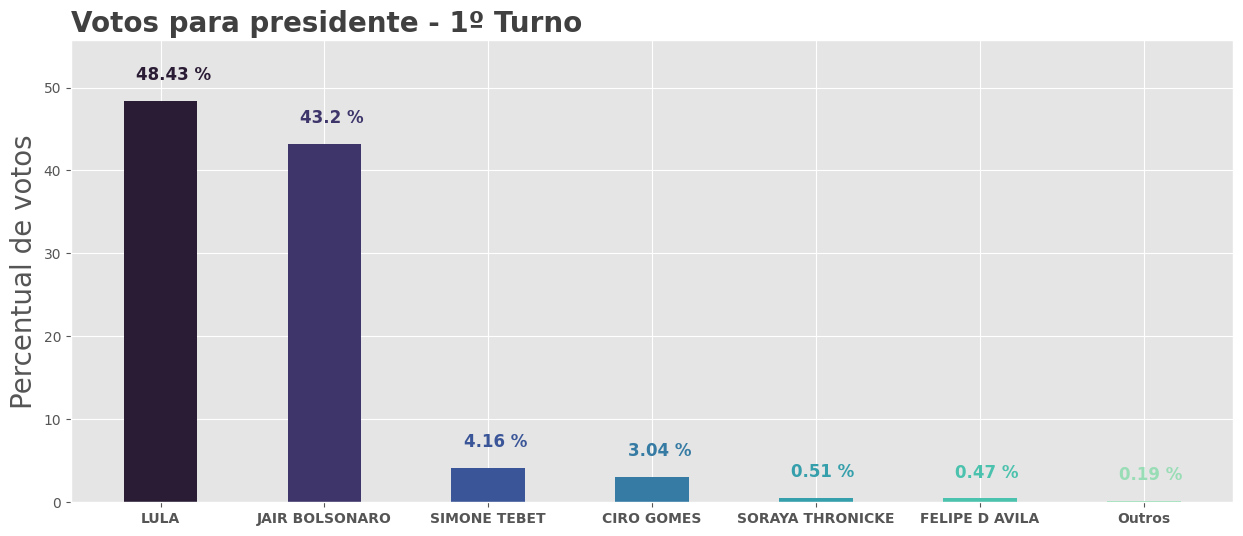

In [36]:
# Tamanho
plt.figure( figsize=(15, 6))

# Paleta
Paleta_Cores = sns.color_palette('mako', len(mais_votados) )

# Plot
plt.bar( 
    mais_votados['NM_URNA_CANDIDATO'], 
    mais_votados['%'],
    width=0.45,
    color=Paleta_Cores
     )

# Titulo
plt.title('Votos para presidente - 1º Turno', loc='left', fontsize=20, color='#404040', fontweight=600)

# Labels
plt.ylabel('Percentual de votos', size=20)
plt.xlabel('', size=5)
plt.xticks( rotation=0, fontweight ='bold')

# Ajustando escala do gráfico
plt.ylim( 0, mais_votados['%'].max() + ( mais_votados['%'].max() * 0.15 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( mais_votados['%'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.15, Valor + 2.5 ,
      # Valor no gráfico
      str(Valor) + ' %',
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )


## Todos os candidatos eleitos por partido

In [50]:
total_eleitos = dados_tratados[
    (( dados_tratados['DS_CARGO'] == 'Deputado Estadual' ) |
    ( dados_tratados['DS_CARGO'] == 'Deputado Federal' ) |
    ( dados_tratados['DS_CARGO'] == 'Governador' ) | 
    ( dados_tratados['DS_CARGO'] == 'Senador' )) &
    (( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP' ) |
    ( dados_tratados['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA' ))
]
total_eleitos.shape

(1590, 7)

In [44]:
total_eleitos['DS_CARGO'].unique()

array(['Deputado Estadual', 'Deputado Federal', 'Governador', 'Senador'],
      dtype=object)

In [45]:
total_eleitos['DS_SIT_TOT_TURNO'].unique()

array(['ELEITO POR QP', 'ELEITO POR MÉDIA', 'ELEITO'], dtype=object)

In [51]:
total_eleitos = pd.DataFrame(total_eleitos.groupby(['SG_UF','SG_PARTIDO', 'NM_URNA_CANDIDATO'])['QT_VOTOS_NOMINAIS_VALIDOS'].sum())
total_eleitos.sort_values('QT_VOTOS_NOMINAIS_VALIDOS', ascending=False,inplace=True)
total_eleitos.reset_index(inplace=True)
#qtd_vot_sen.columns = ['Estado', 'Partido', 'Candidato', 'Votos']
total_eleitos.head()

,SG_UF,SG_PARTIDO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS_VALIDOS
0,SP,PL,ASTRONAUTA MARCOS PONTES,10714913
1,MG,NOVO,ZEMA,6094136
2,RJ,PL,CLÁUDIO CASTRO,4930288
3,MG,PSC,CLEITINHO,4268193
4,PR,PSD,CARLOS MASSA RATINHO JUNIOR,4243292


In [52]:
total_eleitos = pd.DataFrame(total_eleitos['SG_PARTIDO'].value_counts())
total_eleitos.reset_index(inplace=True)
total_eleitos.rename(columns={'SG_PARTIDO':'Qtd Eleitos', 'index':'Partido'}, inplace=True)

total_de_eleitos = total_eleitos['Qtd Eleitos'].sum()
total_eleitos['%'] = ((total_eleitos['Qtd Eleitos'] / total_de_eleitos) * 100).round(2)

total_eleitos.head(2)

,Partido,Qtd Eleitos,%
0,PL,233,14.65
1,PT,189,11.89


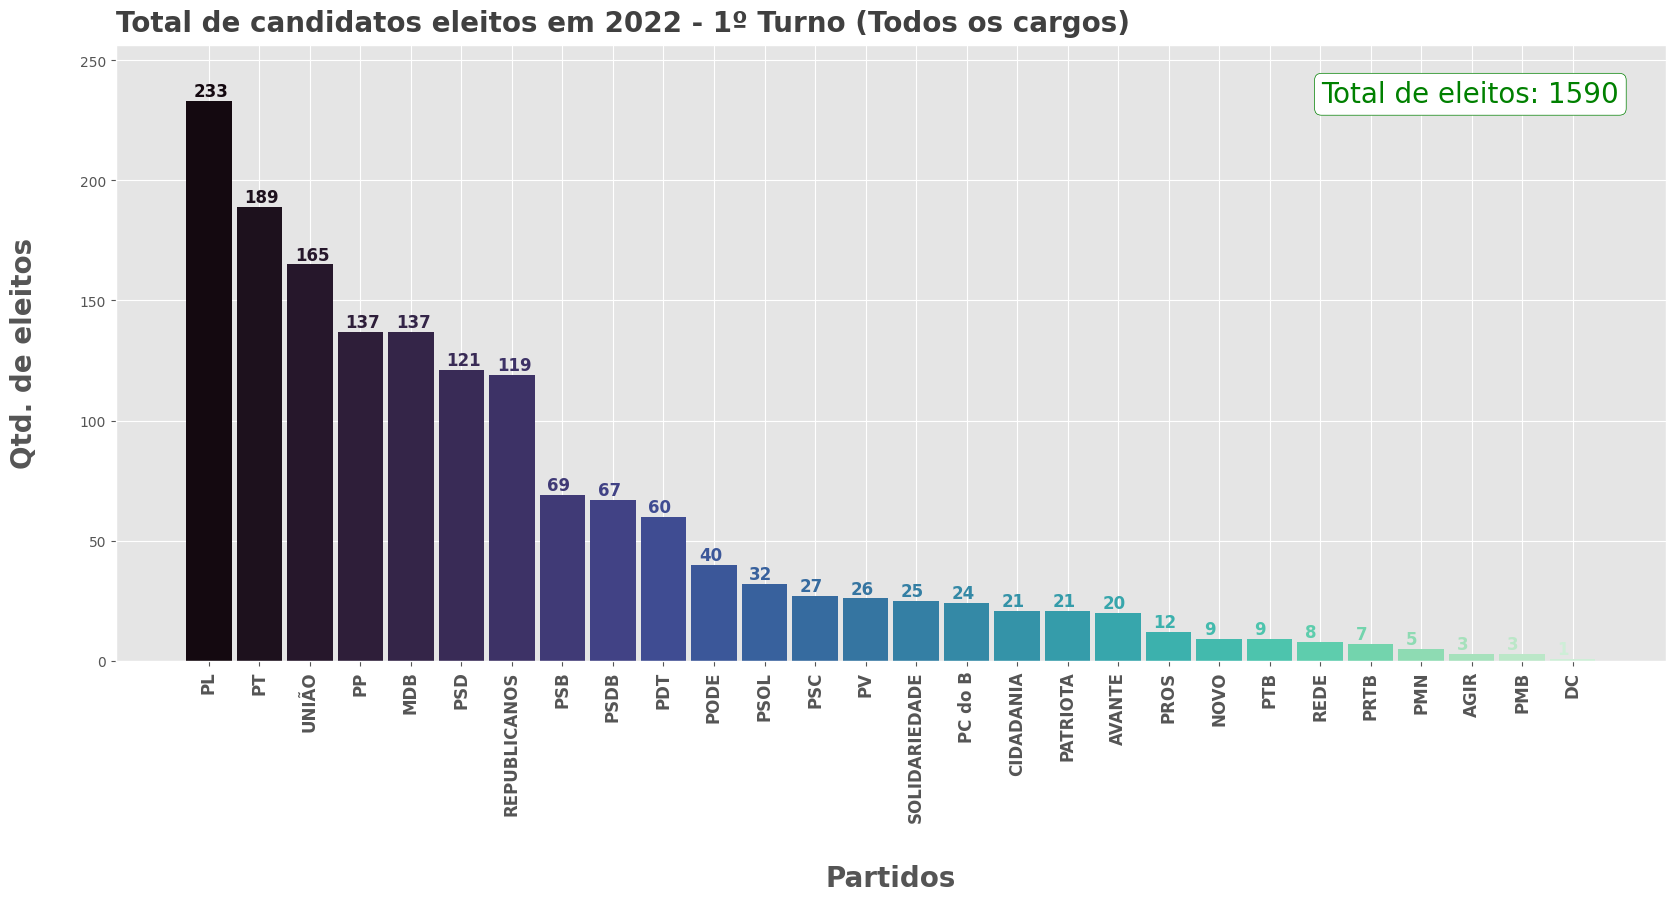

In [60]:
# Tamanho
plt.figure( figsize=(20, 8) )

# Paleta
Paleta_Cores = sns.color_palette('mako', len(total_eleitos) )

# Plot
plt.bar( 
    total_eleitos['Partido'], 
    total_eleitos['Qtd Eleitos'],
    width=0.9,
    color=Paleta_Cores
     )

# Titulo
plt.title('Total de candidatos eleitos em 2022 - 1º Turno (Todos os cargos)', loc='left', fontsize=20, color='#404040', fontweight=600, pad=10)

# Labels
plt.ylabel('Qtd. de eleitos', size=20, labelpad= 30, fontweight ='bold')
plt.xlabel('Partidos', size=20, labelpad= 30, fontweight ='bold')
plt.xticks( rotation=90, fontsize=12, fontweight ='bold')

# Ajustando escala do gráfico
plt.ylim( 0, total_eleitos['Qtd Eleitos'].max() + ( total_eleitos['Qtd Eleitos'].max() * 0.1 ) )

# Incluindo os dados no gráfico
for Posicao, Valor in enumerate( total_eleitos['Qtd Eleitos'] ):
  plt.text( 
      # Posicao do gráfico ( x, y)
      Posicao - 0.3, Valor + 2 ,
      # Valor no gráfico
      Valor,
      # Paleta
      color=Paleta_Cores[Posicao],
      # Tamanho
      size=12,
      # expesura da fonte
      fontweight=700
   )

# Total de eleitos
Total_Eleitos = total_eleitos['Qtd Eleitos'].sum()

# Info complementar
plt.annotate(
    f'Total de eleitos: {Total_Eleitos}',
    xy=(0.97, 0.92),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=20,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
);